In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [3]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

## Data Cleaning

In [8]:
data.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='output'>

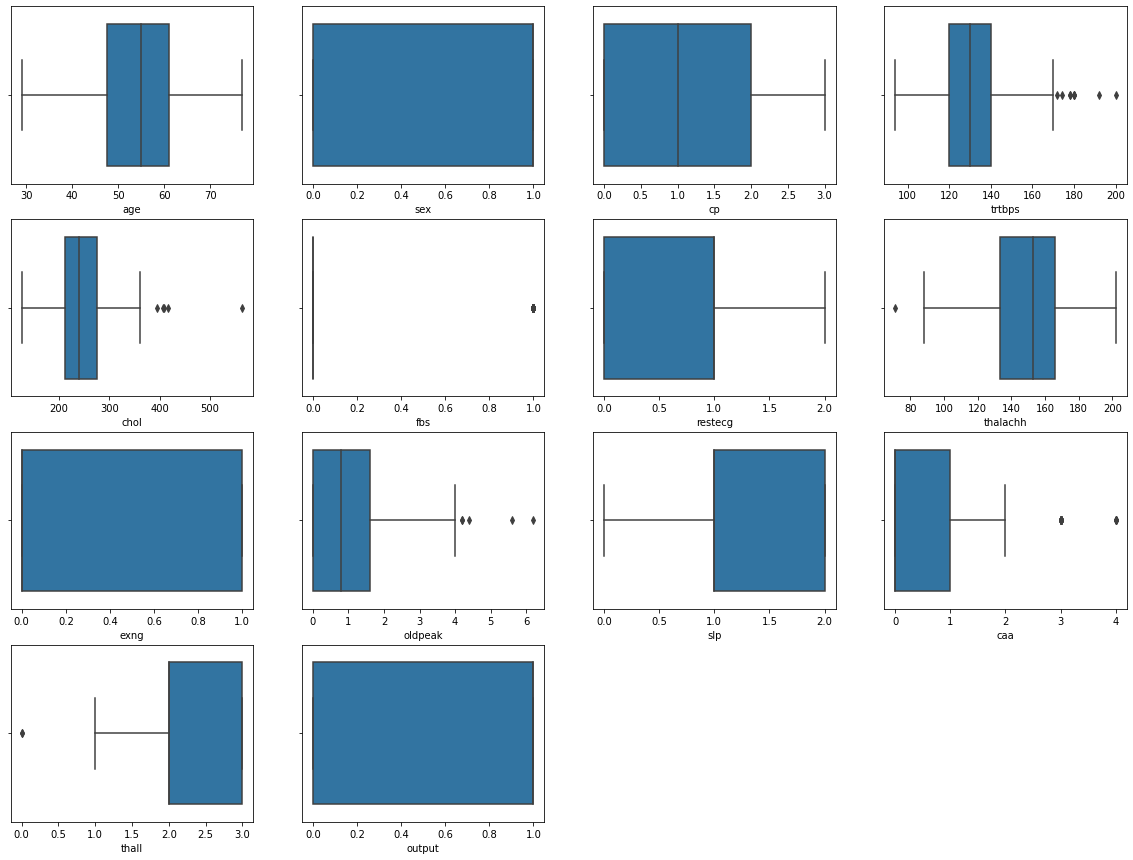

In [9]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(data['age'])

plt.subplot(4,4,2)
sns.boxplot(data['sex'])

plt.subplot(4,4,3)
sns.boxplot(data['cp'])

plt.subplot(4,4,4)
sns.boxplot(data['trtbps'])

plt.subplot(4,4,5)
sns.boxplot(data['chol'])

plt.subplot(4,4,6)
sns.boxplot(data['fbs'])

plt.subplot(4,4,7)
sns.boxplot(data['restecg'])

plt.subplot(4,4,8)
sns.boxplot(data['thalachh'])

plt.subplot(4,4,9)
sns.boxplot(data['exng'])

plt.subplot(4,4,10)
sns.boxplot(data['oldpeak'])

plt.subplot(4,4,11)
sns.boxplot(data['slp'])

plt.subplot(4,4,12)
sns.boxplot(data['caa'])

plt.subplot(4,4,13)
sns.boxplot(data['thall'])

plt.subplot(4,4,14)
sns.boxplot(data['output'])

## outliers
### trtbps, chol, fbs, thalachh, oldpeak, caa, thall

In [10]:
data["trtbps"] = data['trtbps'].clip(lower=data['trtbps'].quantile(0),upper=data['trtbps'].quantile(0.70))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trtbps'>

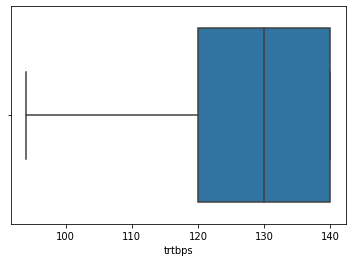

In [11]:
sns.boxplot(data['trtbps'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chol'>

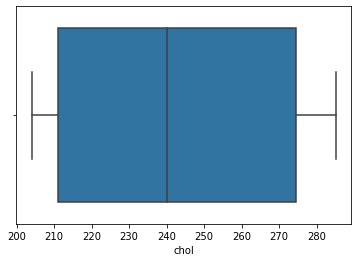

In [12]:
data["chol"] = data['chol'].clip(lower=data['chol'].quantile(0.2),upper=data['chol'].quantile(0.8))

sns.boxplot(data['chol'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fbs'>

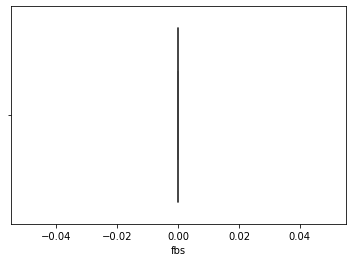

In [13]:
data["fbs"] = data['fbs'].clip(lower=data['fbs'].quantile(0.5),upper=data['fbs'].quantile(0.5))

sns.boxplot(data['fbs'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thalachh'>

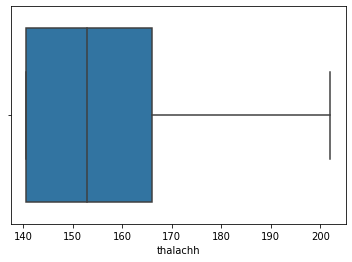

In [14]:
data["thalachh"] = data['thalachh'].clip(lower=data['thalachh'].quantile(0.3),upper=data['thalachh'].quantile(1))

sns.boxplot(data['thalachh'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thalachh'>

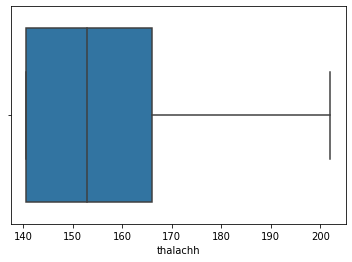

In [15]:
data["oldpeak"] = data['oldpeak'].clip(lower=data['oldpeak'].quantile(0),upper=data['oldpeak'].quantile(0.5))

sns.boxplot(data['thalachh'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='caa'>

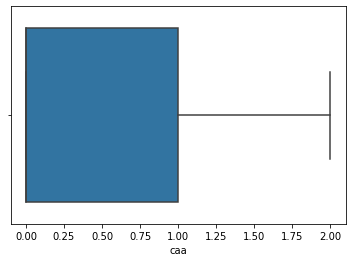

In [16]:
data["caa"] = data['caa'].clip(lower=data['caa'].quantile(0),upper=data['caa'].quantile(0.8))

sns.boxplot(data['caa'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thall'>

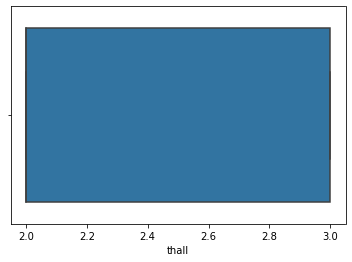

In [17]:
data["thall"] = data['thall'].clip(lower=data['thall'].quantile(0.4),upper=data['thall'].quantile(1))

sns.boxplot(data['thall'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='output'>

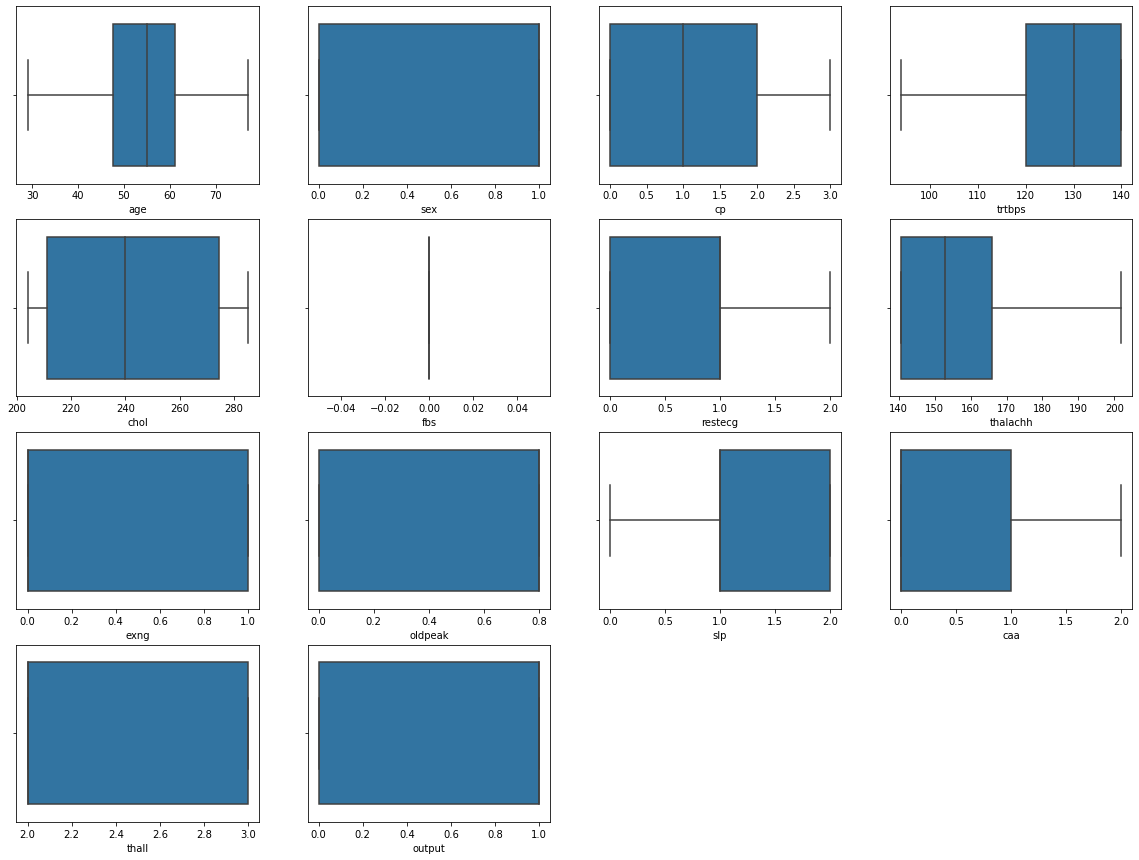

In [18]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(data['age'])

plt.subplot(4,4,2)
sns.boxplot(data['sex'])

plt.subplot(4,4,3)
sns.boxplot(data['cp'])

plt.subplot(4,4,4)
sns.boxplot(data['trtbps'])

plt.subplot(4,4,5)
sns.boxplot(data['chol'])

plt.subplot(4,4,6)
sns.boxplot(data['fbs'])

plt.subplot(4,4,7)
sns.boxplot(data['restecg'])

plt.subplot(4,4,8)
sns.boxplot(data['thalachh'])

plt.subplot(4,4,9)
sns.boxplot(data['exng'])

plt.subplot(4,4,10)
sns.boxplot(data['oldpeak'])

plt.subplot(4,4,11)
sns.boxplot(data['slp'])

plt.subplot(4,4,12)
sns.boxplot(data['caa'])

plt.subplot(4,4,13)
sns.boxplot(data['thall'])

plt.subplot(4,4,14)
sns.boxplot(data['output'])

<AxesSubplot:>

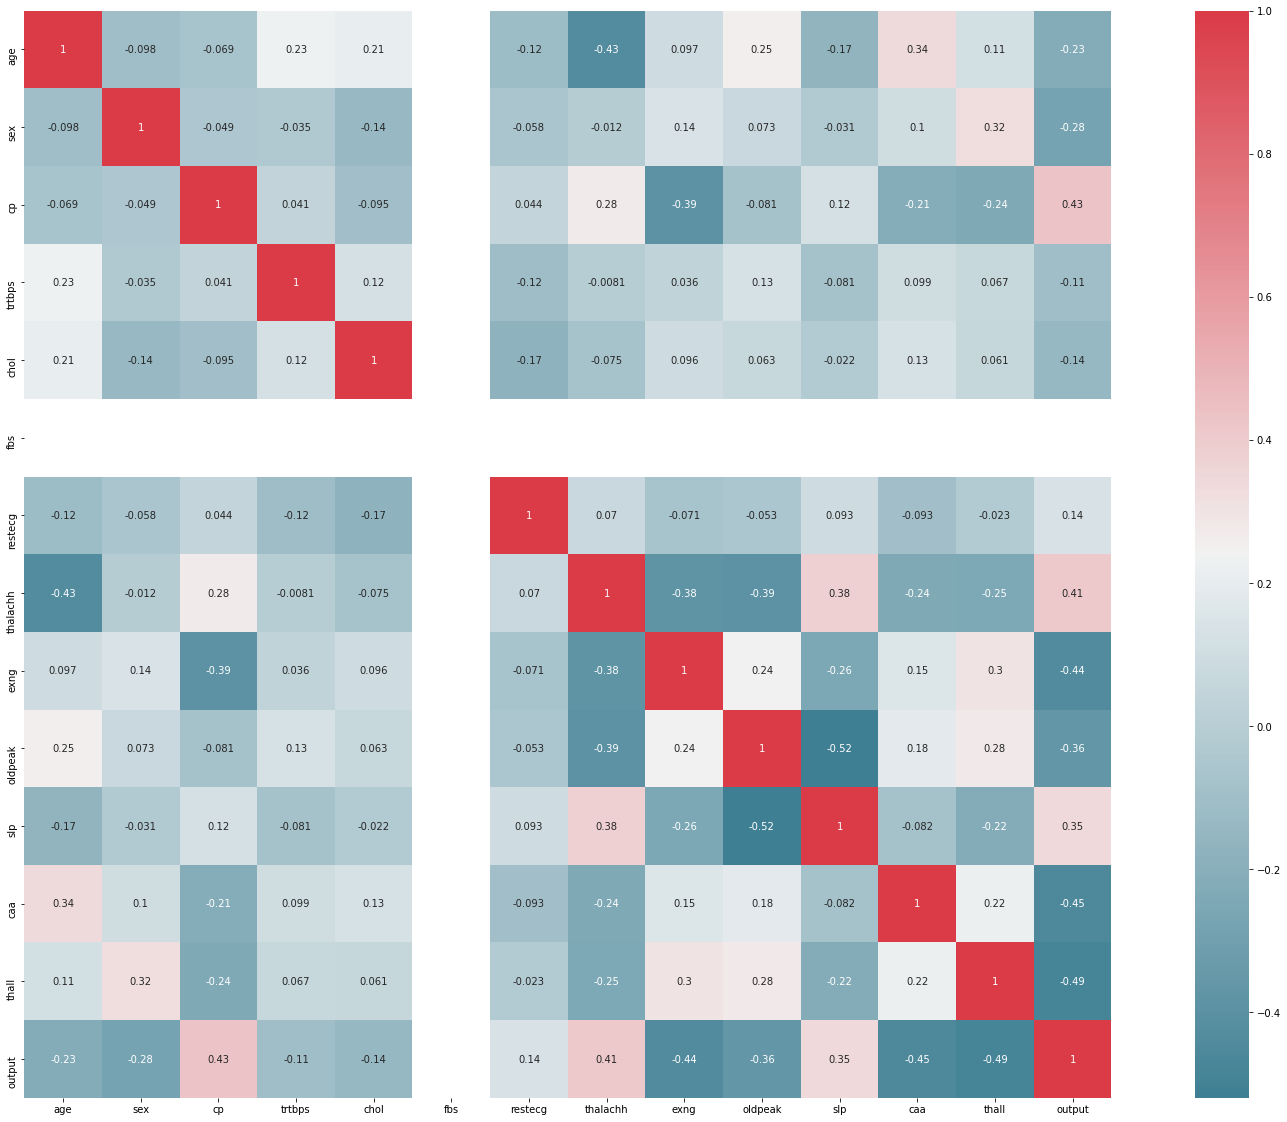

In [19]:
f,ax = plt.subplots(figsize=(30,20))
corr = data.corr('pearson')
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Prediction

In [21]:
from sklearn.model_selection import train_test_split
x = data.drop('output',axis=1)
y = pd.DataFrame(data,columns=['output'])
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,140,233.0,0,0,150.0,0,0.8,0,0,2
1,37,1,2,130,250.0,0,1,187.0,0,0.8,0,0,2
2,41,0,1,130,204.0,0,0,172.0,0,0.8,2,0,2
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,120,285.2,0,1,163.0,1,0.6,2,0,2


In [22]:
y.head()

,output
0,1
1,1
2,1
3,1
4,1


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 13), (242, 1), (61, 13), (61, 1))

## Logistic Regression as L

In [24]:
from sklearn.linear_model import LogisticRegression
L = LogisticRegression()

In [25]:
L.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
r_sq = L.score(x_train,y_train)
print('Coef of determination:',r_sq)

Coef of determination: 0.8636363636363636


In [27]:
pred = L.predict(x_test)
L.score(x_test,y_test)

0.8688524590163934

In [28]:
print("Actual output:\n",list(y_test['output']))
print("Predicted output:\n",list(pred))

Actual output:
 [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
Predicted output:
 [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [29]:
print(*[list(pred)[i] == list(y_test['output'])[i] for i in range(len(list(pred)))], sep=' ')

True False True True True True True True True False True False True True True True True True True True True True False True True False False True True True False True True False True True True True True True True True True True True True True True True True True True True True True True True True True True True
